In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 

tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [3]:
# simple, manual label encoding using map method
tips['smoker_bin'] = tips['smoker'].map({
    'Yes': 1,
    'No' : 0}
)

tips['sex_bin'] = tips['sex'].map({
    'Male': 1,
    'Female' : 0}
)

tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,smoker_bin,sex_bin
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1


In [4]:
# X = tips[['smoker_bin']] # 0101011101110101
y = tips['tip'] # continous

# convert the target column, then use it for y

X = tips[['total_bill']] 
y = tips['sex_bin'] # encoded column

# yes, how much did they tip?
# are we predicting a continous value?

In [5]:
model_dt = DecisionTreeClassifier() # classification
model_lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42, test_size=0.2)

model_dt.fit(X_train, y_train) # fitting here, must be numeric
model_lr.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)
y_pred_lr = model_lr.predict(X_test)

In [11]:
cr_dt = classification_report(y_test,y_pred_dt)

cr_lr = classification_report(y_test,y_pred_lr)
print(cr_dt,cr_lr)

              precision    recall  f1-score   support

           0       0.48      0.58      0.52        19
           1       0.69      0.60      0.64        30

    accuracy                           0.59        49
   macro avg       0.59      0.59      0.58        49
weighted avg       0.61      0.59      0.60        49
               precision    recall  f1-score   support

           0       1.00      0.05      0.10        19
           1       0.62      1.00      0.77        30

    accuracy                           0.63        49
   macro avg       0.81      0.53      0.43        49
weighted avg       0.77      0.63      0.51        49



In [16]:
# exercise

# Load dataset
df = sns.load_dataset("tips")

# Features and target
X = df[['total_bill', 'tip']]
y = df['smoker'].map({'Yes': 1, 'No': 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
accuracy_dt = accuracy_score(y_test, dt.predict(X_test))

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
accuracy_lr = accuracy_score(y_test, lr.predict(X_test))

print("acc_dt =", accuracy_dt)
print("acc_lr =", accuracy_lr)


acc_dt = 0.5510204081632653
acc_lr = 0.6122448979591837


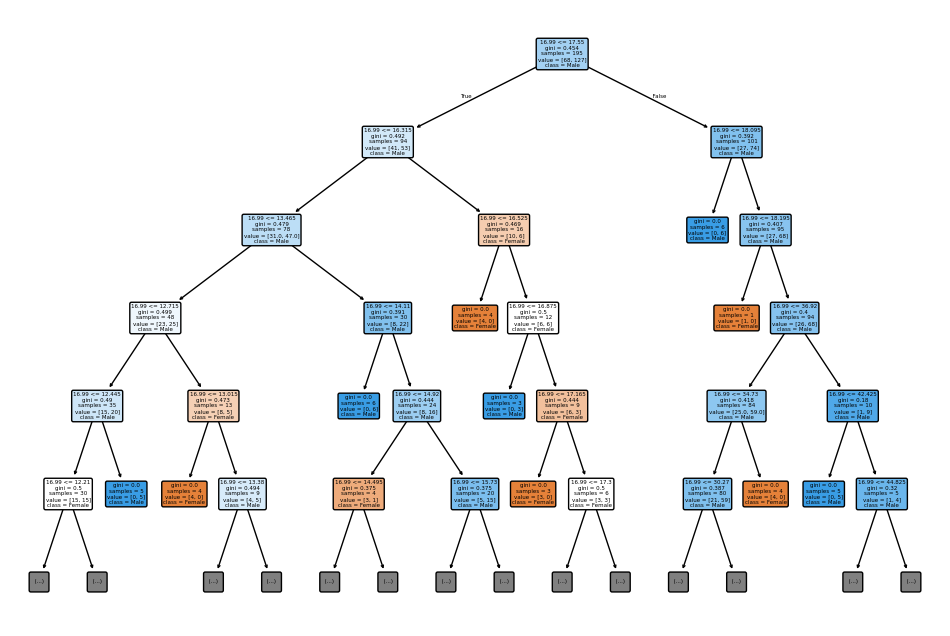

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12,8))

plot_tree(model_dt,
          feature_names = tips['total_bill'],  # input features
          class_names = tips['sex'],            # target name
          max_depth=5,
          filled = True,
          rounded=True )

plt.show()


In [20]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()  # classification
model_rf.fit(X_train, y_train)       # fitting here, must be
y_pred_rf = model_rf.predict(X_test)

